In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

Reading data from the CSV into a dataframe

In [117]:
folder='./Datasets/'
raw_data_1 = pd.read_csv(folder+'2000-01.csv')
raw_data_2 = pd.read_csv(folder+'2001-02.csv')
raw_data_3 = pd.read_csv(folder+'2002-03.csv') 
raw_data_4 = pd.read_csv(folder+'2003-04.csv')
raw_data_5 = pd.read_csv(folder+'2004-05.csv')
raw_data_6 = pd.read_csv(folder+'2005-06.csv')
raw_data_7 = pd.read_csv(folder+'2006-07.csv')
raw_data_8 = pd.read_csv(folder+'2007-08.csv')
raw_data_9 = pd.read_csv(folder+'2008-09.csv')
raw_data_10 = pd.read_csv(folder+'2009-10.csv')
raw_data_11 = pd.read_csv(folder+'2010-11.csv')
raw_data_12 = pd.read_csv(folder+'2011-12.csv')
raw_data_13 = pd.read_csv(folder+'2012-13.csv')
raw_data_14 = pd.read_csv(folder+'2013-14.csv')
raw_data_15 = pd.read_csv(folder+'2014-15.csv')
raw_data_16 = pd.read_csv(folder+'2015-16.csv')
raw_data_17 = pd.read_csv(folder+'2016-17.csv')
raw_data_18 = pd.read_csv(folder+'2017-18.csv')
raw_data_19 = pd.read_csv(folder+'2018-19.csv')
raw_data_20 = pd.read_csv(folder+'2019-20.csv')
raw_data_21 = pd.read_csv(folder+'2020-2021.csv')
raw_data_22 = pd.read_csv(folder+'2021-2022.csv')

In [3]:
print(len(raw_data_19))


160


In [118]:
#Gets all the statistics related to the gameplay
columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']
playing_stats_1 = raw_data_1[columns]
playing_stats_2 = raw_data_2[columns]
playing_stats_3 = raw_data_3[columns]
playing_stats_4 = raw_data_4[columns]
playing_stats_5 = raw_data_5[columns]
playing_stats_6 = raw_data_6[columns]
playing_stats_7 = raw_data_7[columns]
playing_stats_8 = raw_data_8[columns]
playing_stats_9 = raw_data_9[columns]
playing_stats_10 = raw_data_10[columns]
playing_stats_11 = raw_data_11[columns]
playing_stats_12 = raw_data_12[columns]
playing_stats_13 = raw_data_13[columns]
playing_stats_14 = raw_data_14[columns]
playing_stats_15 = raw_data_15[columns]
playing_stats_16 = raw_data_16[columns]
playing_stats_17 = raw_data_17[columns]
playing_stats_18 = raw_data_18[columns]
#playing_stats_19 = raw_data_19[columns]
playing_stats_20 = raw_data_20[columns]
playing_stats_21 = raw_data_21[columns]
playing_stats_22 = raw_data_22[columns]


In [119]:
playing_stats_1 

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,19/08/00,Charlton,Man City,4,0,H
1,19/08/00,Chelsea,West Ham,4,2,H
2,19/08/00,Coventry,Middlesbrough,1,3,A
3,19/08/00,Derby,Southampton,2,2,D
4,19/08/00,Leeds,Everton,2,0,H
...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A
376,19/05/01,Middlesbrough,West Ham,2,1,H
377,19/05/01,Newcastle,Aston Villa,3,0,H
378,19/05/01,Southampton,Arsenal,3,2,H


In [120]:
#Gets the goals agg arranged by teams
def get_goals_agg(playing_stats):
    #Created a dictionary with the teams as keys and the goals scored as values
    teams = {}
    for i in playing_stats.groupby('HomeTeam').mean(numeric_only=True).T.columns:
        teams[i] = []
    for i in range(len(playing_stats)):
        teams[playing_stats['HomeTeam'][i]].append(playing_stats['FTHG'][i])
        teams[playing_stats['AwayTeam'][i]].append(playing_stats['FTAG'][i])
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

In [128]:
def get_home_goals_19(playing_stats):
    """
    Returns individual home match goals for each team with their opponents.
    
    Parameters:
    -----------
    playing_stats : DataFrame
        DataFrame containing match statistics with columns:
        - HomeTeam: home team name
        - AwayTeam: away team name
        - FTHG: full time home goals
        - Date: match date (optional, used for sorting)
    
    Returns:
    --------
    DataFrame
        DataFrame containing home matches with columns:
        - HomeTeam: home team name
        - AwayTeam: away team name
        - Goals: goals scored by home team
    """
    # Verify required columns
    required_cols = {'HomeTeam', 'AwayTeam', 'FTHG'}
    if not required_cols.issubset(playing_stats.columns):
        raise ValueError("DataFrame must contain 'HomeTeam', 'AwayTeam', and 'FTHG' columns")
    
    # Create a copy and sort by date if available
    stats = playing_stats.copy()
    if 'Date' in stats.columns:
        stats = stats.sort_values('Date')
    
    # Create lists to store the results
    home_teams = []
    away_teams = []
    goals = []
    
    # Process matches for each team
    for team in stats['HomeTeam'].unique():
        # Get home matches for this team
        team_matches = stats[stats['HomeTeam'] == team].head(19)
        
        # Add match details to lists
        for _, match in team_matches.iterrows():
            home_teams.append(match['HomeTeam'])
            away_teams.append(match['AwayTeam'])
            goals.append(match['FTHG'])
    
    # Create and return the DataFrame
    result_df = pd.DataFrame({
        'HomeTeam': home_teams,
        'AwayTeam': away_teams,
        'Goals': goals
    })
    
    return result_df

In [133]:
# Test de la fonction avec playing_stats_1
test_df = get_home_goals_19(playing_stats_1)
# Filter matches where Man City is the home team
man_city_home = test_df[test_df['HomeTeam'] == 'Man City']
print("Manchester City's home matches:")
print(man_city_home)

Manchester City's home matches:
     HomeTeam       AwayTeam  Goals
361  Man City    Southampton      0
362  Man City      Leicester      0
363  Man City        Everton      5
364  Man City      Tottenham      0
365  Man City        Arsenal      0
366  Man City          Leeds      0
367  Man City       Bradford      2
368  Man City  Middlesbrough      1
369  Man City     Man United      0
370  Man City        Chelsea      1
371  Man City     Sunderland      4
372  Man City        Ipswich      2
373  Man City       Coventry      1
374  Man City          Derby      0
375  Man City       West Ham      1
376  Man City      Newcastle      0
377  Man City       Charlton      1
378  Man City      Liverpool      1
379  Man City    Aston Villa      1


In [9]:
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

In [10]:
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_agg(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat = playing_stat.copy()
  
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


In [11]:
playing_stats_1 = get_gss(playing_stats_1)
playing_stats_2 = get_gss(playing_stats_2)
playing_stats_3 = get_gss(playing_stats_3)
playing_stats_4 = get_gss(playing_stats_4)
playing_stats_5 = get_gss(playing_stats_5)
playing_stats_6 = get_gss(playing_stats_6)
playing_stats_7 = get_gss(playing_stats_7)
playing_stats_8 = get_gss(playing_stats_8)
playing_stats_9 = get_gss(playing_stats_9)
playing_stats_10 = get_gss(playing_stats_10)
playing_stats_11 = get_gss(playing_stats_11)
playing_stats_12 = get_gss(playing_stats_12)
playing_stats_13 = get_gss(playing_stats_13)
playing_stats_14 = get_gss(playing_stats_14)
playing_stats_15 = get_gss(playing_stats_15)
playing_stats_16 = get_gss(playing_stats_16)
playing_stats_17 = get_gss(playing_stats_17)
playing_stats_18 = get_gss(playing_stats_18)
#playing_stats_19 = get_gss(playing_stats_19)
#playing_stats_20 = get_gss(playing_stats_20)
playing_stats_21 = get_gss(playing_stats_21)
playing_stats_22 = get_gss(playing_stats_22)

In [12]:
playing_stats_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,40,66,63,44
376,19/05/01,Middlesbrough,West Ham,2,1,H,42,44,43,48
377,19/05/01,Newcastle,Aston Villa,3,0,H,41,46,50,40
378,19/05/01,Southampton,Arsenal,3,2,H,37,61,46,35


In [13]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

In [14]:
def get_cuml_points(matchres):
    matchres_points = matchres.apply(lambda col: col.map(get_points))
    
    for i in range(2, 39):
        matchres_points[i] = matchres_points[i] + matchres_points[i - 1]
    
    matchres_points.insert(loc=0, column=0, value=[0] * matchres.shape[0])
    return matchres_points


In [15]:
def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean(numeric_only=True).T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

In [16]:
matchres = get_matchres(playing_stats_1)
cum_pts = get_cuml_points(matchres)
cum_pts

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Arsenal,0,0,3,6,7,8,11,12,15,18,...,53,54,57,60,60,63,66,69,70,70
Aston Villa,0,1,2,2,5,8,9,12,12,13,...,38,41,44,45,48,49,50,51,54,54
Bradford,0,0,3,4,4,5,5,5,6,6,...,17,18,18,21,24,24,24,25,25,26
Charlton,0,3,3,3,4,5,8,11,12,12,...,42,42,45,45,45,46,49,52,52,52
Chelsea,0,3,3,4,5,6,6,7,10,10,...,42,45,48,51,54,54,54,57,58,61
Coventry,0,0,3,6,6,7,7,7,8,11,...,24,24,27,30,30,33,33,33,33,34
Derby,0,1,1,2,3,4,4,5,5,5,...,34,35,35,35,35,38,38,38,41,42
Everton,0,0,3,4,4,7,7,8,8,9,...,32,32,35,38,38,38,38,41,41,42
Ipswich,0,0,1,4,4,4,7,8,11,12,...,46,49,52,53,56,59,62,62,65,66
Leeds,0,3,6,6,7,7,8,11,14,14,...,44,47,50,53,56,59,62,62,65,68


In [17]:
get_matchres(playing_stats_1)

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
Arsenal,L,W,W,D,D,W,D,W,W,W,...,W,D,W,W,L,W,W,W,D,L
Aston Villa,D,D,L,W,W,D,W,L,D,W,...,D,W,W,D,W,D,D,D,W,L
Bradford,L,W,D,L,D,L,L,D,L,L,...,D,D,L,W,W,L,L,D,L,D
Charlton,W,L,L,D,D,W,W,D,L,W,...,D,L,W,L,L,D,W,W,L,L
Chelsea,W,L,D,D,D,L,D,W,L,W,...,L,W,W,W,W,L,L,W,D,W
Coventry,L,W,W,L,D,L,L,D,W,L,...,D,L,W,W,L,W,L,L,L,D
Derby,D,L,D,D,D,L,D,L,L,L,...,W,D,L,L,L,W,L,L,W,D
Everton,L,W,D,L,W,L,D,L,D,W,...,D,L,W,W,L,L,L,W,L,D
Ipswich,L,D,W,L,L,W,D,W,D,W,...,L,W,W,D,W,W,W,L,W,D
Leeds,W,W,L,D,L,D,W,W,L,D,...,D,W,W,W,W,W,W,L,W,W


In [18]:
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat = playing_stat.copy()
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [19]:
playing_stats_1 = get_agg_points(playing_stats_1)
playing_stats_2 = get_agg_points(playing_stats_2)
playing_stats_3 = get_agg_points(playing_stats_3)
playing_stats_4 = get_agg_points(playing_stats_4)
playing_stats_5 = get_agg_points(playing_stats_5)
playing_stats_6 = get_agg_points(playing_stats_6)
playing_stats_7 = get_agg_points(playing_stats_7)
playing_stats_8 = get_agg_points(playing_stats_8)
playing_stats_9 = get_agg_points(playing_stats_9)
playing_stats_10 = get_agg_points(playing_stats_10)
playing_stats_11 = get_agg_points(playing_stats_11)
playing_stats_12 = get_agg_points(playing_stats_12)
playing_stats_13 = get_agg_points(playing_stats_13)
playing_stats_14 = get_agg_points(playing_stats_14)
playing_stats_15 = get_agg_points(playing_stats_15)
playing_stats_16 = get_agg_points(playing_stats_16)
playing_stats_17 = get_agg_points(playing_stats_17)
playing_stats_18 = get_agg_points(playing_stats_18)
playing_stats_21 =get_agg_points(playing_stats_21)
playing_stats_22= get_agg_points(playing_stats_22)

In [20]:
playing_stats_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,40,66,63,44,34,58
376,19/05/01,Middlesbrough,West Ham,2,1,H,42,44,43,48,39,42
377,19/05/01,Newcastle,Aston Villa,3,0,H,41,46,50,40,48,54
378,19/05/01,Southampton,Arsenal,3,2,H,37,61,46,35,49,70


The function creates a form summary (like "WWDLD") for each team by aggregating the results over the last num games before each matchday.

In [47]:
# `playing_stat`: a DataFrame containing football match stats
# `num`: how many previous matchdays to include in the form
def get_form(playing_stat, num):
    # Get match results first
    form = get_matchres(playing_stat)
    form_final = form.copy()
    
    # For each matchday
    for i in range(1, 39):
        # For each team
        for team in form_final.index:
            # Get form for previous num matches
            form_str = ''
            for j in range(min(num, i)):  # Only look at available previous matches
                if i-j-1 >= 0:  # Check if the previous match exists
                    form_str = form.loc[team, i-j] + form_str  # Prepend to keep most recent last
                else:
                    form_str = 'M' + form_str  # Missing data for unavailable matches
            
            # Store the form string
            form_final.loc[team, i] = form_str
            
    return form_final

In [48]:
get_form(playing_stats_1,3)

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
Arsenal,L,LW,LWW,WWD,WDD,DDW,DWD,WDW,DWW,WWW,...,WLW,LWD,WDW,DWW,WWL,WLW,LWW,WWW,WWD,WDL
Aston Villa,D,DD,DDL,DLW,LWW,WWD,WDW,DWL,WLD,LDW,...,DWD,WDW,DWW,WWD,WDW,DWD,WDD,DDD,DDW,DWL
Bradford,L,LW,LWD,WDL,DLD,LDL,DLL,LLD,LDL,DLL,...,LLD,LDD,DDL,DLW,LWW,WWL,WLL,LLD,LDL,DLD
Charlton,W,WL,WLL,LLD,LDD,DDW,DWW,WWD,WDL,DLW,...,WDD,DDL,DLW,LWL,WLL,LLD,LDW,DWW,WWL,WLL
Chelsea,W,WL,WLD,LDD,DDD,DDL,DLD,LDW,DWL,WLW,...,DWL,WLW,LWW,WWW,WWW,WWL,WLL,LLW,LWD,WDW
Coventry,L,LW,LWW,WWL,WLD,LDL,DLL,LLD,LDW,DWL,...,DDD,DDL,DLW,LWW,WWL,WLW,LWL,WLL,LLL,LLD
Derby,D,DL,DLD,LDD,DDD,DDL,DLD,LDL,DLL,LLL,...,DWW,WWD,WDL,DLL,LLL,LLW,LWL,WLL,LLW,LWD
Everton,L,LW,LWD,WDL,DLW,LWL,WLD,LDL,DLD,LDW,...,WLD,LDL,DLW,LWW,WWL,WLL,LLL,LLW,LWL,WLD
Ipswich,L,LD,LDW,DWL,WLL,LLW,LWD,WDW,DWD,WDW,...,WWL,WLW,LWW,WWD,WDW,DWW,WWW,WWL,WLW,LWD
Leeds,W,WW,WWL,WLD,LDL,DLD,LDW,DWW,WWL,WLD,...,DWD,WDW,DWW,WWW,WWW,WWW,WWW,WWL,WLW,LWW


This function: Adds two new columns to playing_stat:

HMn: home team’s form on matchday n (most recent result from last num games)

AMn: away team’s form on matchday n (same)

In [44]:
def add_form(playing_stat, num):
    # Create a copy of the DataFrame to avoid modifying the original
    playing_stat = playing_stat.copy()
    
    # Remove any existing form columns for this number
    form_cols = [f'HM{num}', f'AM{num}']
    playing_stat = playing_stat.drop(columns=form_cols, errors='ignore')
    
    # Get the form data
    form = get_form(playing_stat, num)
    h = []  # Home team form
    a = []  # Away team form
    
    # Process each match
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        week = (i // 10) + 1  # Calculate the match week (1-38)
        
        # Get form strings for both teams
        if week <= num:
            # Not enough previous matches for full history
            h.append('M')
            a.append('M')
        else:
            # Get the last character (most recent result) from form string
            ht_form = form.loc[ht][week]
            at_form = form.loc[at][week]
            h.append(ht_form[-1] if len(ht_form) > 0 else 'M')
            a.append(at_form[-1] if len(at_form) > 0 else 'M')
    
    # Add the form columns
    playing_stat[f'HM{num}'] = h
    playing_stat[f'AM{num}'] = a
    
    return playing_stat

In [38]:
# Test add_form uniquement avec num=3
test_df = add_form(playing_stats_1, 2)
test_df 



,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM2,AM2
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0,0,M,M
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0,0,M,M
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,0,0,M,M
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,0,0,M,M
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,0,0,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,40,66,63,44,34,58,L,D
376,19/05/01,Middlesbrough,West Ham,2,1,H,42,44,43,48,39,42,D,W
377,19/05/01,Newcastle,Aston Villa,3,0,H,41,46,50,40,48,54,D,W
378,19/05/01,Southampton,Arsenal,3,2,H,37,61,46,35,49,70,W,D


In [56]:

# Function to add form history features
def add_form_df(playing_statistics):
    """
    Add form history columns to the dataframe showing last 5 matches for each team
    HM1-HM5: Home team's form for last 5 matches (most recent to oldest)
    AM1-AM5: Away team's form for last 5 matches (most recent to oldest)
    """
    # Make a copy to avoid modifying original
    df = playing_statistics.copy()
    
    # Create team results dictionary to track form
    team_forms = {}
    for team in df['HomeTeam'].unique():
        team_forms[team] = ['M'] * 5  # Initialize with 'M' for first 5 matches
    
    # Remove any existing form columns
    form_cols = [col for col in df.columns if col.startswith('HM') or col.startswith('AM')]
    df = df.drop(columns=form_cols, errors='ignore')
    
    # Initialize form columns
    for i in range(1, 6):
        df[f'HM{i}'] = 'M'
        df[f'AM{i}'] = 'M'
    
    # Process each match sequentially to build form history
    for idx in range(len(df)):
        home_team = df.iloc[idx]['HomeTeam']
        away_team = df.iloc[idx]['AwayTeam']
        result = df.iloc[idx]['FTR']
        
        # Get current form lists for both teams
        home_form = team_forms[home_team]
        away_form = team_forms[away_team]
        
        # Update current row with existing form
        for i in range(5):
            df.at[idx, f'HM{i+1}'] = home_form[i]
            df.at[idx, f'AM{i+1}'] = away_form[i]
        
        # Update form history based on this match result
        if result == 'H':
            # Home win
            home_form = ['W'] + home_form[:-1]
            away_form = ['L'] + away_form[:-1]
        elif result == 'A':
            # Away win
            home_form = ['L'] + home_form[:-1]
            away_form = ['W'] + away_form[:-1]
        else:
            # Draw
            home_form = ['D'] + home_form[:-1]
            away_form = ['D'] + away_form[:-1]
            
        # Store updated form history
        team_forms[home_team] = home_form
        team_forms[away_team] = away_form
        
    return df

In [57]:
playing_stats_1 = add_form_df(playing_stats_1)
playing_stats_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,40,66,63,44,...,L,D,W,W,D,L,W,L,L,W
376,19/05/01,Middlesbrough,West Ham,2,1,H,42,44,43,48,...,D,W,L,L,W,L,L,L,W,W
377,19/05/01,Newcastle,Aston Villa,3,0,H,41,46,50,40,...,D,W,L,D,D,D,W,D,D,W
378,19/05/01,Southampton,Arsenal,3,2,H,37,61,46,35,...,W,D,L,W,D,W,L,W,D,L


In [58]:
playing_stats_1 = add_form_df(playing_stats_1)
playing_stats_2 = add_form_df(playing_stats_2)
playing_stats_3 = add_form_df(playing_stats_3)
playing_stats_4 = add_form_df(playing_stats_4)
playing_stats_5 = add_form_df(playing_stats_5)
playing_stats_6 = add_form_df(playing_stats_6)
playing_stats_7 = add_form_df(playing_stats_7)
playing_stats_8 = add_form_df(playing_stats_8)
playing_stats_9 = add_form_df(playing_stats_9)
playing_stats_10 = add_form_df(playing_stats_10)
playing_stats_11 = add_form_df(playing_stats_11)
playing_stats_12 = add_form_df(playing_stats_12)
playing_stats_13 = add_form_df(playing_stats_13)
playing_stats_14 = add_form_df(playing_stats_14)
playing_stats_15 = add_form_df(playing_stats_15)
playing_stats_16 = add_form_df(playing_stats_16)
playing_stats_17 = add_form_df(playing_stats_17)
playing_stats_18 = add_form_df(playing_stats_18)
playing_stats_21 = add_form_df(playing_stats_21)
playing_stats_22 = add_form_df(playing_stats_22)


In [59]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]
playing_stats_1 = playing_stats_1[cols]
playing_stats_2 = playing_stats_2[cols]
playing_stats_3 = playing_stats_3[cols]
playing_stats_4 = playing_stats_4[cols]
playing_stats_5 = playing_stats_5[cols]
playing_stats_6 = playing_stats_6[cols]
playing_stats_7 = playing_stats_7[cols]
playing_stats_8 = playing_stats_8[cols]
playing_stats_9 = playing_stats_9[cols]
playing_stats_10 = playing_stats_10[cols]
playing_stats_11 = playing_stats_11[cols]
playing_stats_12 = playing_stats_12[cols]
playing_stats_13 = playing_stats_13[cols]
playing_stats_14 = playing_stats_14[cols]
playing_stats_15 = playing_stats_15[cols]
playing_stats_16 = playing_stats_16[cols]
playing_stats_17 = playing_stats_17[cols]
playing_stats_18 = playing_stats_18[cols]
playing_stats_21 = playing_stats_21[cols]
playing_stats_22 = playing_stats_22[cols]

In [60]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

In [61]:
playing_stats_1 = get_mw(playing_stats_1)
playing_stats_2 = get_mw(playing_stats_2)
playing_stats_3 = get_mw(playing_stats_3)
playing_stats_4 = get_mw(playing_stats_4)
playing_stats_5 = get_mw(playing_stats_5)
playing_stats_6 = get_mw(playing_stats_6)
playing_stats_7 = get_mw(playing_stats_7)
playing_stats_8 = get_mw(playing_stats_8)
playing_stats_9 = get_mw(playing_stats_9)
playing_stats_10 = get_mw(playing_stats_10)
playing_stats_11 = get_mw(playing_stats_11)
playing_stats_12 = get_mw(playing_stats_12)
playing_stats_13 = get_mw(playing_stats_13)
playing_stats_14 = get_mw(playing_stats_14)
playing_stats_15 = get_mw(playing_stats_15)
playing_stats_16 = get_mw(playing_stats_16)
playing_stats_17 = get_mw(playing_stats_17)
playing_stats_18 = get_mw(playing_stats_18)
playing_stats_21 = get_mw(playing_stats_21)
playing_stats_22 = get_mw(playing_stats_22)

final dataframe

In [62]:
playing_stat = pd.concat([playing_stats_1, playing_stats_2, playing_stats_3, playing_stats_4, playing_stats_5, playing_stats_6,
                        playing_stats_7, playing_stats_8, playing_stats_9, playing_stats_10, playing_stats_11, playing_stats_12,
                        playing_stats_13, playing_stats_14, playing_stats_15, playing_stats_16, playing_stats_17, playing_stats_18
                        , playing_stats_21, playing_stats_22], ignore_index=True)

In [63]:
# Check the last few rows of the DataFrame to see the form patterns
print("Last 5 matches form for home teams:")
print(playing_stats_1[['HomeTeam', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5']].tail(10))

print("\nLast 5 matches form for away teams:")
print(playing_stats_1[['AwayTeam', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5']].tail(10))

# Check if form values are being properly updated
last_match = playing_stat.iloc[-1]
print("\nDetailed form info for last match:")
print(f"Home Team: {last_match['HomeTeam']}")
print(f"Home Form: {last_match['HM1']},{last_match['HM2']},{last_match['HM3']},{last_match['HM4']},{last_match['HM5']}")
print(f"Away Team: {last_match['AwayTeam']}")
print(f"Away Form: {last_match['AM1']},{last_match['AM2']},{last_match['AM3']},{last_match['AM4']},{last_match['AM5']}")

Last 5 matches form for home teams:
          HomeTeam HM1 HM2 HM3 HM4 HM5
370       Charlton   L   W   W   D   L
371       Coventry   L   L   L   W   L
372          Derby   W   L   L   W   L
373        Everton   L   W   L   L   L
374          Leeds   W   L   W   W   W
375       Man City   L   W   D   W   L
376  Middlesbrough   D   L   W   L   W
377      Newcastle   D   L   D   W   D
378    Southampton   W   L   D   L   D
379      Tottenham   L   D   L   L   W

Last 5 matches form for away teams:
        AwayTeam AM1 AM2 AM3 AM4 AM5
370    Liverpool   D   W   W   W   W
371     Bradford   L   D   L   L   W
372      Ipswich   W   L   W   W   W
373   Sunderland   W   W   D   L   L
374    Leicester   W   L   L   L   L
375      Chelsea   D   W   L   L   W
376     West Ham   W   L   L   L   W
377  Aston Villa   W   D   D   D   W
378      Arsenal   D   W   W   W   L
379   Man United   L   L   W   D   W

Detailed form info for last match:
Home Team: Norwich
Home Form: D,L,L,L,L
Away Team: Tott

In [64]:
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

In [65]:
playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)
playing_stat 

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,M,M,M,M,M,1,MMMMM,MMMMM,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,M,M,M,M,M,1,MMMMM,MMMMM,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,...,M,M,M,M,M,1,MMMMM,MMMMM,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,...,M,M,M,M,M,1,MMMMM,MMMMM,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,M,M,M,M,M,1,MMMMM,MMMMM,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,22/05/2022,Crystal Palace,Man United,1,0,H,49,57,46,56,...,L,W,D,L,L,38,LDWWD,LWDLL,8,4
7596,22/05/2022,Leicester,Southampton,4,1,H,58,42,58,63,...,L,L,L,D,L,38,DWWLL,LLLDL,7,1
7597,22/05/2022,Liverpool,Wolves,3,1,H,91,37,25,40,...,D,L,D,L,L,38,WWDWW,DLDLL,13,2
7598,22/05/2022,Man City,Aston Villa,3,2,H,96,50,24,51,...,D,D,L,W,W,38,DWWWW,DDLWW,13,8


In [66]:
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

In [67]:
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

In [68]:
playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [70]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']
playing_stat['DiffGD'] = playing_stat['HTGS'] - playing_stat['ATGS']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [72]:
playing_stat

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffGD
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,22/05/2022,Crystal Palace,Man United,1,0,H,49,57,46,56,...,0,0,0,0,0,3,1,-13,4,2
7596,22/05/2022,Leicester,Southampton,4,1,H,58,42,58,63,...,0,0,0,0,0,0,-21,9,6,21
7597,22/05/2022,Liverpool,Wolves,3,1,H,91,37,25,40,...,0,0,0,0,0,66,-3,38,11,69
7598,22/05/2022,Man City,Aston Villa,3,2,H,96,50,24,51,...,0,0,0,0,0,72,-1,45,5,73


In [ ]:
playing_stat.to_csv('Final_Dataset.csv', index=False)

In [ ]:
# Test de la fonction avec les données de la première saison
test_df = get_home_goals_19(playing_stats_1)

# Afficher les résultats pour quelques équipes
print("Buts marqués à domicile par match :")
print(test_df.head())

# Vérifier les détails des buts pour une équipe spécifique
team = test_df['HomeTeam'].unique()[0]
print(f"\nDétails des buts pour {team}:")
print(test_df[test_df['HomeTeam'] == team])

Load Data

In [3]:
df = pd.read_csv('Final_Dataset.csv')
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffGD
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,22/05/2022,Crystal Palace,Man United,1,0,H,49,57,46,56,...,0,0,0,0,0,3,1,-13,4,2
7596,22/05/2022,Leicester,Southampton,4,1,H,58,42,58,63,...,0,0,0,0,0,0,-21,9,6,21
7597,22/05/2022,Liverpool,Wolves,3,1,H,91,37,25,40,...,0,0,0,0,0,66,-3,38,11,69
7598,22/05/2022,Man City,Aston Villa,3,2,H,96,50,24,51,...,0,0,0,0,0,72,-1,45,5,73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7600 non-null   object
 1   HomeTeam       7600 non-null   object
 2   AwayTeam       7600 non-null   object
 3   FTHG           7600 non-null   int64 
 4   FTAG           7600 non-null   int64 
 5   FTR            7600 non-null   object
 6   HTGS           7600 non-null   int64 
 7   ATGS           7600 non-null   int64 
 8   HTGC           7600 non-null   int64 
 9   ATGC           7600 non-null   int64 
 10  HTP            7600 non-null   int64 
 11  ATP            7600 non-null   int64 
 12  HM1            7600 non-null   object
 13  HM2            7600 non-null   object
 14  HM3            7600 non-null   object
 15  HM4            7600 non-null   object
 16  HM5            7600 non-null   object
 17  AM1            7600 non-null   object
 18  AM2            7600 non-null

In [5]:
df.describe()

,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,HTFormPts,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffGD
count,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,...,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,1.518026,1.149605,24.524474,24.614211,24.596974,24.464342,25.301053,25.459605,19.500000,6.206316,...,0.014342,0.062895,0.016842,0.052763,0.011053,-0.072500,0.149868,-0.158553,-0.238289,-0.222368
std,1.300871,1.139956,17.254790,17.198916,16.437060,16.397509,18.083033,18.042972,10.966578,3.581299,...,0.118904,0.242790,0.128688,0.223575,0.104556,14.892451,14.865216,14.253610,4.474717,21.328752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-65.000000,-63.000000,-63.000000,-15.000000,-100.000000
25%,1.000000,0.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-8.000000,-7.000000,-3.000000,-10.000000
50%,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,19.500000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,35.000000,35.000000,36.000000,36.000000,36.000000,37.000000,29.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,6.000000,3.000000,10.000000
max,9.000000,7.000000,102.000000,105.000000,85.000000,82.000000,94.000000,97.000000,38.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,76.000000,78.000000,66.000000,15.000000,105.000000


In [6]:
df.isnull().sum()

Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
DiffGD           0
dtype: int64

In [7]:
df.isna().sum()

Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
DiffGD           0
dtype: int64

Encode categorical data

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import (
    f_classif, chi2, mutual_info_classif, SelectKBest
)
from sklearn.pipeline import Pipeline
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(dtype=int, sparse_output=True)

In [12]:
# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df[["FTR"]])
# Get correct feature names using get_feature_names_out()
encoded_columns = encoder.get_feature_names_out(["FTR"])
#Convert the encoded data into a DataFrame with the correct column names
nominal = pd.DataFrame(encoded_array.toarray(),
                       columns=encoded_columns) 
print(encoded_array.toarray())
print(nominal)

[[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [1 0 0]]
      FTR_A  FTR_D  FTR_H
0         0      0      1
1         0      0      1
2         1      0      0
3         0      1      0
4         0      0      1
...     ...    ...    ...
7595      0      0      1
7596      0      0      1
7597      0      0      1
7598      0      0      1
7599      1      0      0

[7600 rows x 3 columns]


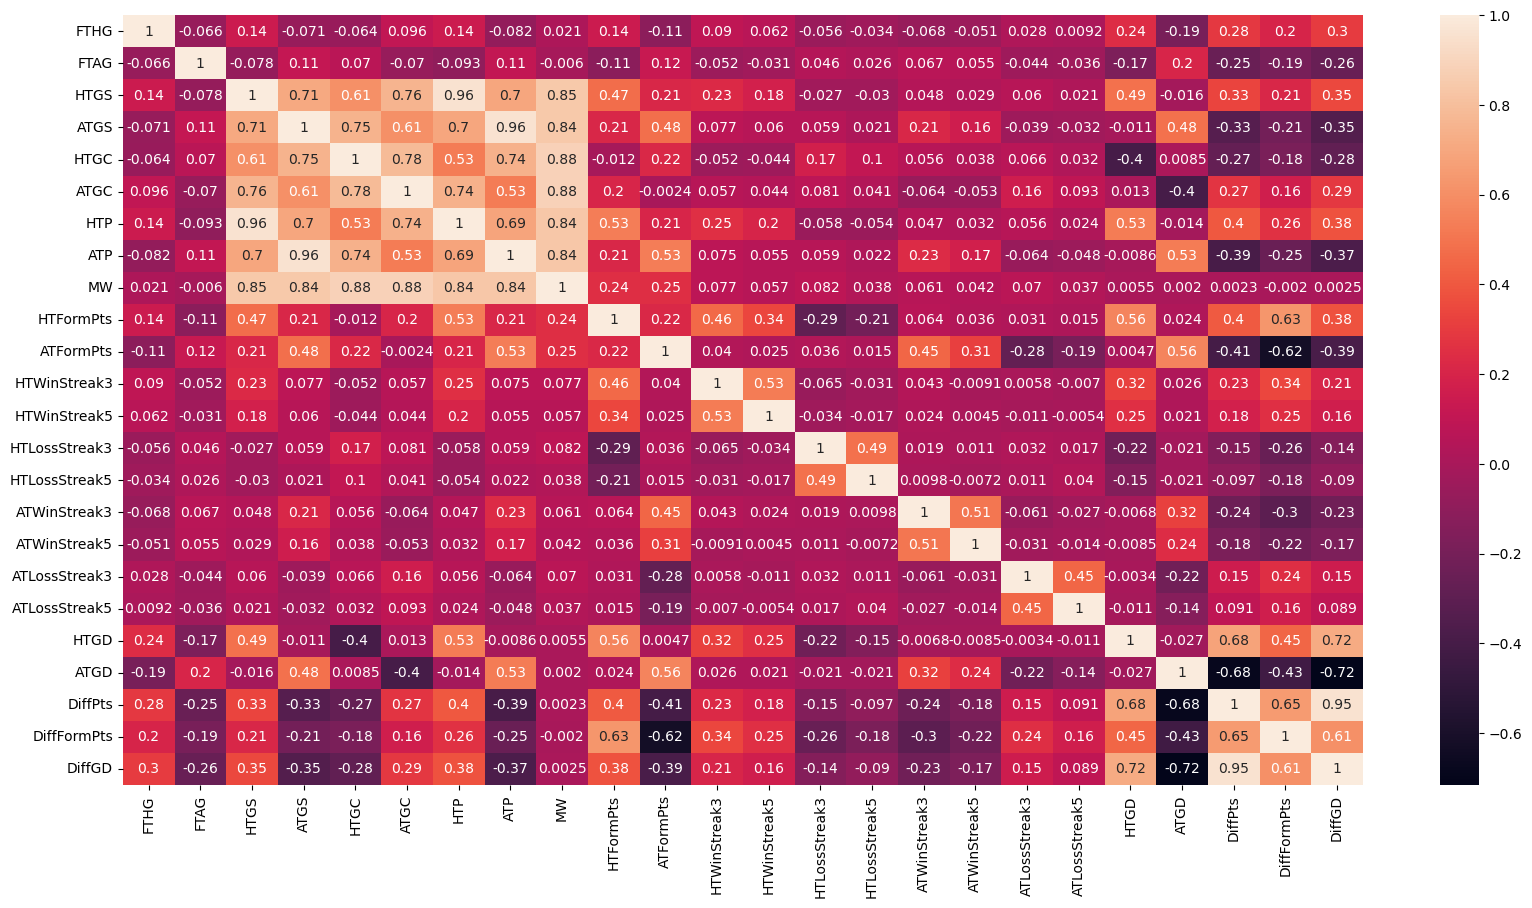

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)
plt.show()

In [19]:
#Features engineering
y_label = df['FTR']
X = df.copy().drop(columns=['FTR'])

In [20]:
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()
print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)

Numériques : ['FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'MW', 'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffGD']
Catégorielles : ['Date', 'HomeTeam', 'AwayTeam', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'HTFormPtsStr', 'ATFormPtsStr']


In [24]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_label)  
y_encoded  


array([2, 2, 0, ..., 2, 2, 0])

In [25]:
F, pvals = f_classif(X[num_cols], y_encoded)
anova_res = pd.Series(pvals, index=num_cols).sort_values()
print("p-values (ANOVA) les plus petites :")
print(anova_res.head(10))


p-values (ANOVA) les plus petites :
FTHG            0.000000e+00
FTAG            0.000000e+00
DiffGD         3.669895e-200
DiffPts        1.226397e-192
ATGD           1.866831e-108
DiffFormPts     1.519470e-96
HTGD            4.239642e-95
ATFormPts       4.529714e-38
HTFormPts       7.026946e-38
HTP             2.093885e-36
dtype: float64


In [33]:
selectdata = df.copy().drop(columns=['Date','HomeTeam','AwayTeam','FTHG','FTAG','HTGS','ATGS','HTGC','ATGC','HM4','HM5','AM4','AM5','MW','HTFormPtsStr','ATFormPtsStr','HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3','ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'])

In [34]:
selectdata.keys()

Index(['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3',
       'HTFormPts', 'ATFormPts', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts',
       'DiffGD'],
      dtype='object')

In [35]:
selectdata.tail()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,DiffGD
7595,H,45,58,L,D,W,L,W,D,8,4,3,1,-13,4,2
7596,H,49,40,D,W,W,L,L,L,7,1,0,-21,9,6,21
7597,H,89,51,W,W,D,D,L,D,13,2,66,-3,38,11,69
7598,H,90,45,D,W,W,D,D,L,13,8,72,-1,45,5,73
7599,A,22,68,D,L,L,W,W,D,1,11,-56,24,-46,-10,-80


In [37]:
n_features = selectdata.shape[1] -1
n_matches = selectdata.shape[0]
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))


Total number of matches: 7600
Number of features: 15


In [38]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

THE SCATTER matrix is plotting each of the columns specified against each other column.

Each cell of the matrix :

shows the relationship between two variables

Displays a histogram on the diagonal for the distribution of each variable

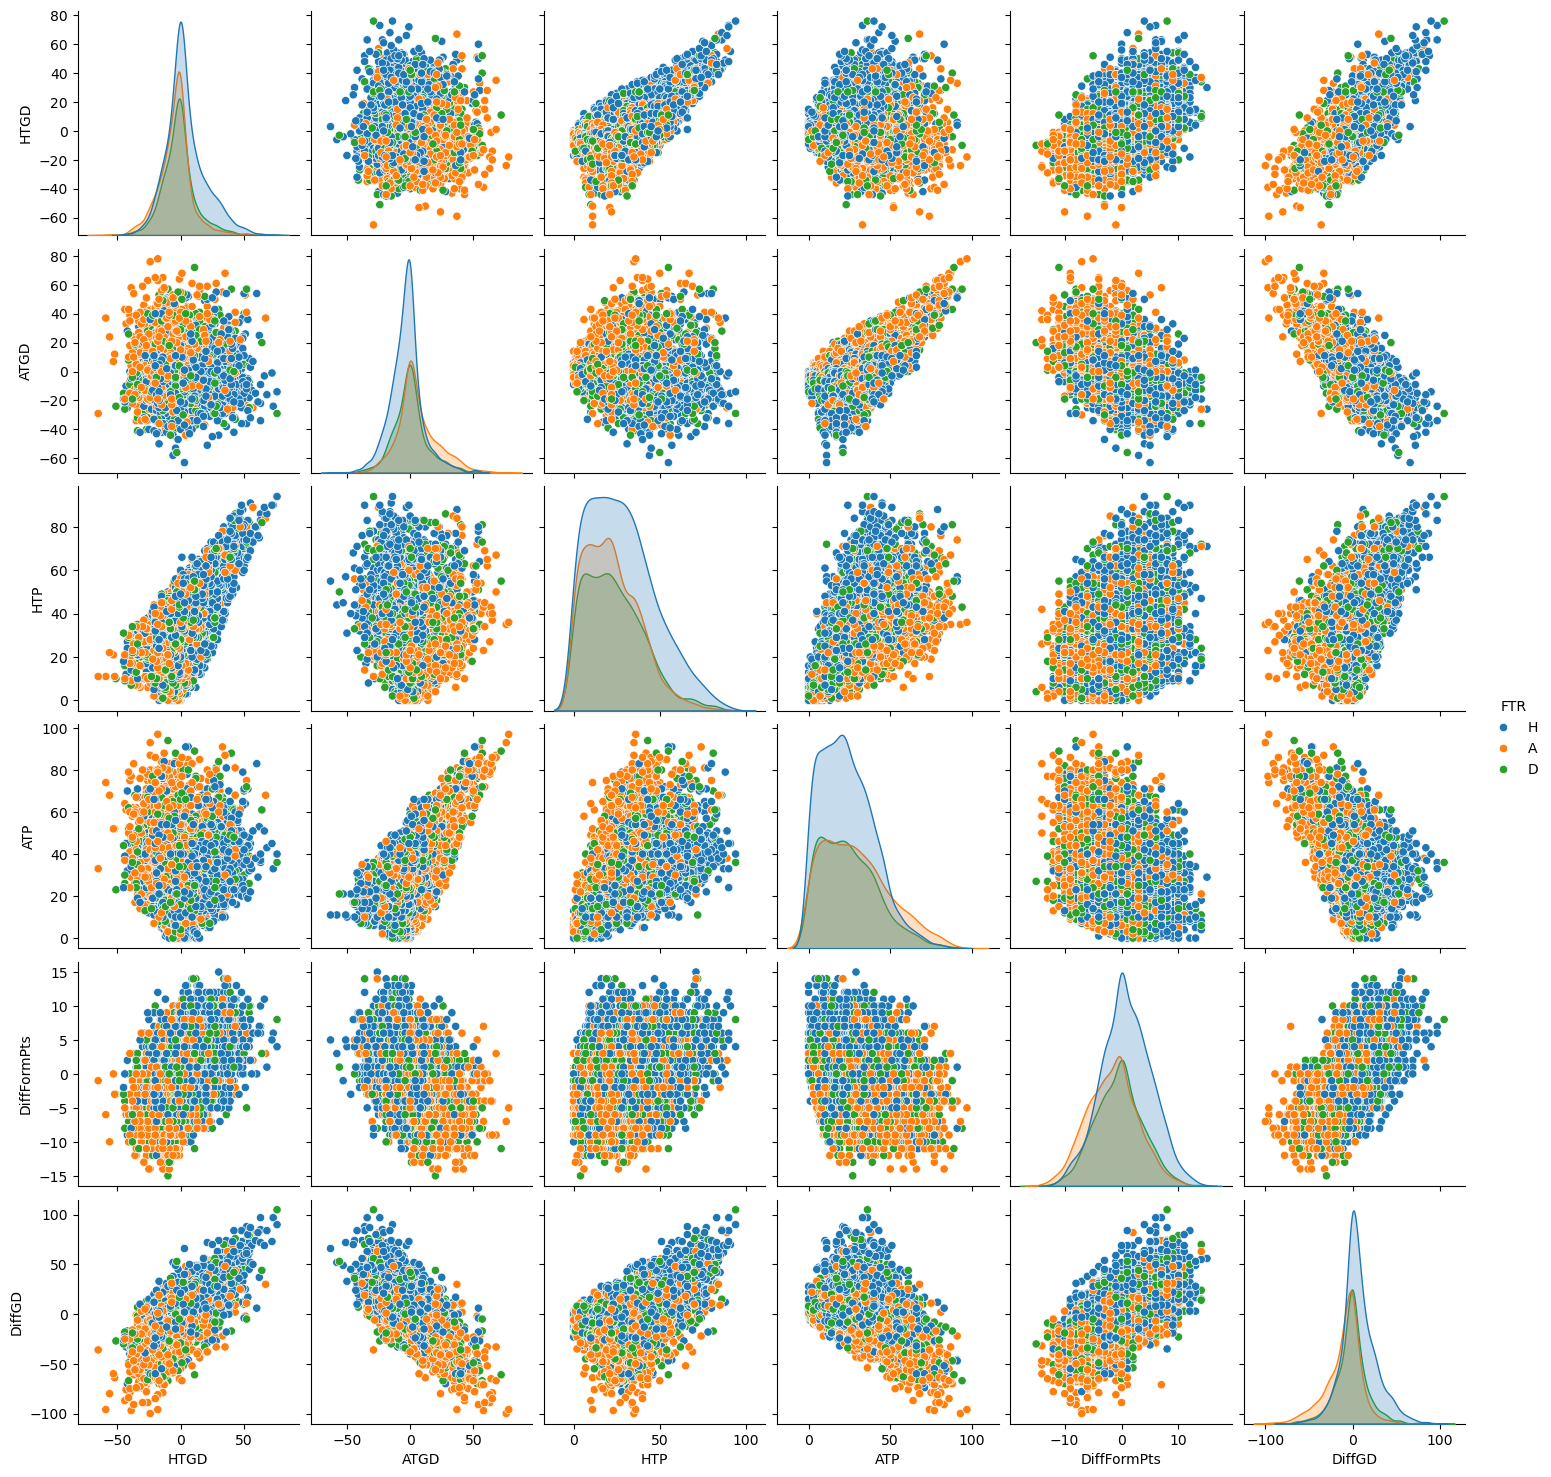

In [44]:
sns.pairplot(selectdata[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffGD', 'FTR']], hue='FTR')
plt.show()


In [47]:
X_all = selectdata.copy().drop('FTR',axis=1)
y_all = selectdata['FTR']
#Standarising the data
from sklearn.preprocessing import scale
#Centre to the mean
cols = [['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffGD']]
for col in cols:
    X_all[col] = scale(X_all[col])

print(X_all)


           HTP       ATP HM1 HM2 HM3 AM1 AM2 AM3  HTFormPts  ATFormPts  \
0    -1.399252 -1.411147   M   M   M   M   M   M          0          0   
1    -1.399252 -1.411147   M   M   M   M   M   M          0          0   
2    -1.399252 -1.411147   M   M   M   M   M   M          0          0   
3    -1.399252 -1.411147   M   M   M   M   M   M          0          0   
4    -1.399252 -1.411147   M   M   M   M   M   M          0          0   
...        ...       ...  ..  ..  ..  ..  ..  ..        ...        ...   
7595  1.089432  1.803613   L   D   W   L   W   D          8          4   
7596  1.310649  0.805929   D   W   W   L   L   L          7          1   
7597  3.522813  1.415625   W   W   D   D   L   D         13          2   
7598  3.578117  1.083063   D   W   W   D   D   L         13          8   
7599 -0.182562  2.357882   D   L   L   W   W   D          1         11   

          HTGD      ATGD  DiffPts  DiffFormPts    DiffGD  
0     0.004869 -0.010082        0     0.053256  0.01

In [48]:
# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(X_all[["HM1","HM2","HM3","AM1","AM2","AM3"]])
# Get correct feature names using get_feature_names_out()
encoded_columns = encoder.get_feature_names_out(["HM1","HM2","HM3","AM1","AM2","AM3"])
#Convert the encoded data into a DataFrame with the correct column names
nominal = pd.DataFrame(encoded_array.toarray(),
                       columns=encoded_columns) 
print(encoded_array.toarray())
print(nominal)

[[0 0 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]
      HM1_D  HM1_L  HM1_M  HM1_W  HM2_D  HM2_L  HM2_M  HM2_W  HM3_D  HM3_L  \
0         0      0      1      0      0      0      1      0      0      0   
1         0      0      1      0      0      0      1      0      0      0   
2         0      0      1      0      0      0      1      0      0      0   
3         0      0      1      0      0      0      1      0      0      0   
4         0      0      1      0      0      0      1      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7595      0      1      0      0      1      0      0      0      0      0   
7596      1      0      0      0      0      0      0      1      0      0   
7597      0      0      0      1      0      0      0      1      1      0   
7598      1      0      0      0      0      0      0      1      0      0   
7599      1      0    

In [54]:
X_all_num = X_all.copy().drop(columns=["HM1","HM2","HM3","AM1","AM2","AM3"],axis=1)
X_all_final = pd.concat([X_all_num.reset_index(drop=True), nominal.reset_index(drop=True)],axis=1)
X_all_final

,HTP,ATP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,DiffGD,HM1_D,...,AM1_M,AM1_W,AM2_D,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W
0,-1.399252,-1.411147,0,0,0.004869,-0.010082,0,0.053256,0.010426,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.399252,-1.411147,0,0,0.004869,-0.010082,0,0.053256,0.010426,0,...,1,0,0,0,1,0,0,0,1,0
2,-1.399252,-1.411147,0,0,0.004869,-0.010082,0,0.053256,0.010426,0,...,1,0,0,0,1,0,0,0,1,0
3,-1.399252,-1.411147,0,0,0.004869,-0.010082,0,0.053256,0.010426,0,...,1,0,0,0,1,0,0,0,1,0
4,-1.399252,-1.411147,0,0,0.004869,-0.010082,0,0.053256,0.010426,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,1.089432,1.803613,8,4,0.206326,0.057193,-13,0.947226,0.104203,0,...,0,0,0,0,0,1,1,0,0,0
7596,1.310649,0.805929,7,1,0.004869,-1.422869,9,1.394211,0.995078,1,...,0,0,0,1,0,0,0,1,0,0
7597,3.522813,1.415625,13,2,4.436936,-0.211909,38,2.511674,3.245709,0,...,0,0,0,1,0,0,1,0,0,0
7598,3.578117,1.083063,13,8,4.839851,-0.077358,45,1.170719,3.433262,1,...,0,0,1,0,0,0,0,1,0,0


Spliting the dataset

In [55]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all_final, y_encoded, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_encoded)

Applying Logitstic regression

In [57]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # au lieu de 100
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
Y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy : {accuracy:.2f}")


Accuracy : 0.51


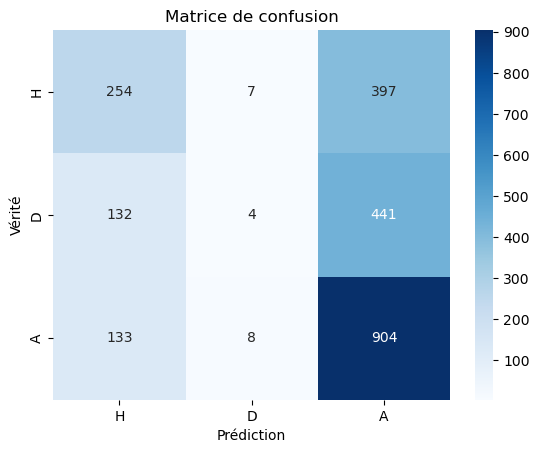

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, Y_pred, labels=[0, 1, 2])  # H=0, D=1, A=2
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.show()


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred, target_names=['H', 'D', 'A']))


              precision    recall  f1-score   support

           H       0.49      0.39      0.43       658
           D       0.21      0.01      0.01       577
           A       0.52      0.87      0.65      1045

    accuracy                           0.51      2280
   macro avg       0.41      0.42      0.36      2280
weighted avg       0.43      0.51      0.43      2280



Applying Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=700,min_samples_split=10,min_samples_leaf=1,random_state=1,n_jobs=-1,oob_score=True)
classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [64]:
Y_pred = classifier.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, Y_pred, labels=[0, 1, 2]) 

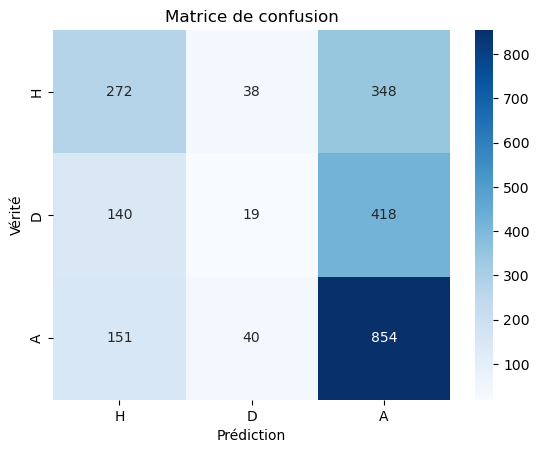

In [66]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.show()


In [67]:
print(classification_report(y_test, Y_pred, target_names=['H', 'D', 'A']))

              precision    recall  f1-score   support

           H       0.48      0.41      0.45       658
           D       0.20      0.03      0.06       577
           A       0.53      0.82      0.64      1045

    accuracy                           0.50      2280
   macro avg       0.40      0.42      0.38      2280
weighted avg       0.43      0.50      0.44      2280



Applying XGBoost

In [68]:
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train)


ModuleNotFoundError: No module named 'xgboost'